<a href="https://colab.research.google.com/github/yurithome123/gpo/blob/main/Distancia_Euclidiana_KNN_oUTROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF UMUARAMA SETEC

# EXEMPLO 1

## CÁLCULO DISTÂNCIA EUCLIDIANA-

In [ ]:
#!pip install -U scikit-learn
#!pip install -U pandas

In [ ]:
from scipy.spatial.distance import pdist, squareform, cdist
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import math

### Exemplo- Verificar a distância d entre dois objetos A e B em um espaço e dimensões x e y e fórmula para o seu cálculo

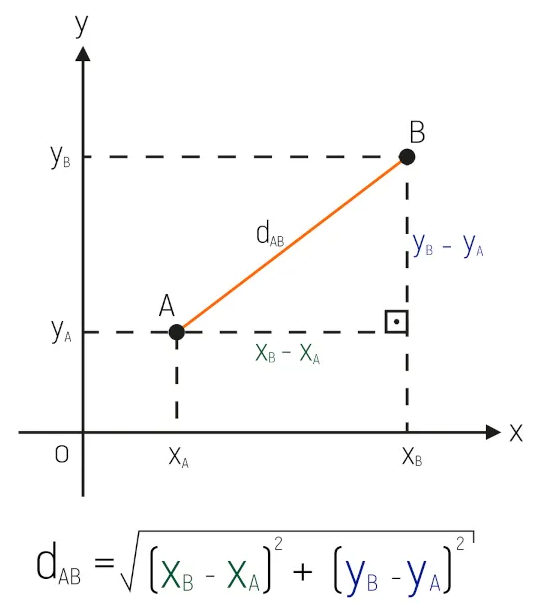

In [ ]:
# Exemplo
d = {'Idade':[17,25,64,30,27,70],
     'Renda': [0,100,500,2500,1700,100],
     'Filhos':[0,2,3,2,10,0],
    'Concedido':['Nao','Sim','Nao','Sim','Nao','Nao']}

df_credito = pd.DataFrame(d)
df_credito

,Idade,Renda,Filhos,Concedido
0,17,0,0,Nao
1,25,100,2,Sim
2,64,500,3,Nao
3,30,2500,2,Sim
4,27,1700,10,Nao
5,70,100,0,Nao


In [ ]:
# Funcção calcula a distância euclidiana em até tres atributos/features/colunas
def dist_euc(df,exemplo):
    acc_dis = []
    for i in range(df.shape[0]):
        dab = math.sqrt(math.pow(df.iloc[i][0]-exemplo[0],2) + math.pow(df.iloc[i][1]-exemplo[1],2) + math.pow(df.iloc[i][2]-exemplo[2],2))
        acc_dis.append(round(dab,2))
    df_dist = pd.DataFrame(acc_dis)
    data_frame_dist = df.merge(df_dist, right_index=True, left_index=True)
    return data_frame_dist.rename(columns={0:"Distancia E"}).sort_values("Distancia E", ascending=True)

### Informar uma amostra nova para que a distância euclidiana seja calculada com cada dos exemplos no dataframe de crédito

In [ ]:
# Infomrar um dado novo para que seja calculado a distância euclidiana com cada exemplo do dataframe de crédito
exemplo = [33,1200,2]

In [ ]:
# Chama a função, passando o df_credito e o novo dado "exemplo"
credito_calc_dist = dist_euc(df_credito,exemplo)

<ipython-input-25-f3864952fb71>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dab = math.sqrt(math.pow(df.iloc[i][0]-exemplo[0],2) + math.pow(df.iloc[i][1]-exemplo[1],2) + math.pow(df.iloc[i][2]-exemplo[2],2))


In [ ]:
# Imprime dataframe com calculo da distância entre novo exemplo e os dados existentes no dataframe credito
credito_calc_dist

,Idade,Renda,Filhos,Concedido,Distancia E
4,27,1700,10,Nao,500.10
2,64,500,3,Nao,700.69
1,25,100,2,Sim,1100.03
5,70,100,0,Nao,1100.62
0,17,0,0,Nao,1200.11
3,30,2500,2,Sim,1300.00


### EXTRA-  # Função que calcula o KNN (K-Nearest Neighbors)

In [ ]:
# Função que calcula o KNN (K-Nearest Neighbors)
# k = #Numero de cluster
# df = #dataframe
# dist = #nome da variavel com as distancias calculadas, ex: "Distancia E"
# classe = #nome variavel que contém as classes

# KNN seleção pela classe majoritária

def knn_class(k,df,dist,classe):
    df = df.sort_values(dist, ascending=True)
    df = df[0:k]
    my_dict = {}
    list_vals = df[classe].unique()
    for i in list_vals:
        qtd = df[df[classe]==i][classe].count()
        my_dict[i] = qtd
    return my_dict

In [ ]:
# Realiza a votação pela quantidade de vizinhos k definidos onde a classe majoritária define a classe da nova amostra
knn_class(5,credito_calc_dist,"Distancia E","Concedido")

{'Nao': 4, 'Sim': 1}

* 4 votos *NÃO* conceder empréstimo
* 1 voto *SIM* para conceder empréstimo

# EXEMPLO 2

In [ ]:
#pip install seaborn==0.11.0

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [12,7]
sns.set(style="whitegrid")

### Fazer download do datagrame [genoma.xlsx] em https://drive.google.com/drive/folders/1CJID8EZXTn2bYxtGB9C48LRaUr96gPZs
#### Carregar dataframe no colab.research
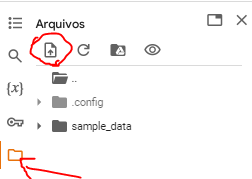

In [ ]:

# Fazendo a leitura de diretório provisório COLAB
genes = pd.read_excel('/content/readcounts.xlsx')

In [ ]:
genes

,Unnamed: 0,H223,H224,H225,H226,H227,H228,H229,H230,H231,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,ENSG00000000003,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,2,0,0,1,0
1,ENSG00000000005,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,ENSG00000000419,1216,1228,1022,912,491,449,466,727,774,...,980,932,360,450,484,926,803,630,537,582
3,ENSG00000000457,189,114,110,289,186,148,169,258,145,...,117,286,137,90,105,275,101,56,87,81
4,ENSG00000000460,74,38,55,127,30,17,45,100,33,...,28,157,34,20,15,139,54,25,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65210,ENSG00000281918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65211,ENSG00000281919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65212,ENSG00000281920,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65213,ENSG00000281921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Coletando nome das colunas (indivíduos)
individuos = genes.columns[1:49]
individuos

Index(['H223', 'H224', 'H225', 'H226', 'H227', 'H228', 'H229', 'H230', 'H231',
       'H232', 'H233', 'H234', 'H235', 'H236', 'H237', 'H238', 'H239', 'H240',
       'H241', 'H242', 'H243', 'H244', 'H245', 'H246', 'H247', 'H248', 'H249',
       'H250', 'H251', 'H252', 'H253', 'H254', 'H255', 'H256', 'H257', 'H258',
       'H259', 'H260', 'H261', 'H262', 'H263', 'H264', 'H265', 'H266', 'H267',
       'H268', 'H269', 'H270'],
      dtype='object')

In [ ]:
# Filtro das colunas
genes.loc[:, individuos]

,H223,H224,H225,H226,H227,H228,H229,H230,H231,H232,...,H261,H262,H263,H264,H265,H266,H267,H268,H269,H270
0,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,2,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1216,1228,1022,912,491,449,466,727,774,576,...,980,932,360,450,484,926,803,630,537,582
3,189,114,110,289,186,148,169,258,145,131,...,117,286,137,90,105,275,101,56,87,81
4,74,38,55,127,30,17,45,100,33,8,...,28,157,34,20,15,139,54,25,21,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65211,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Renomeando coluna do dataframe
genes.rename(columns={"Unnamed: 0":"genes"},inplace=True)

#setando pessoas como index para seguir com transposta do dataframe
genes.set_index("genes",inplace=True)

In [ ]:
# Transposta do dataset deixando genes como features
genes_transpose = genes.T
genes_transpose.rename(columns={'index':'id'}, index={'genes':'index'}, inplace=True)
genes_transpose.reset_index(inplace=True)
genes_transpose.shape

(48, 65216)

In [ ]:
genes_transpose.head(4)

genes,index,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000281913,ENSG00000281914,ENSG00000281915,ENSG00000281916,ENSG00000281917,ENSG00000281918,ENSG00000281919,ENSG00000281920,ENSG00000281921,ENSG00000281922
0,H223,0,0,1216,189,74,31895,2,763,8963,...,0,0,0,0,0,0,0,0,0,0
1,H224,0,0,1228,114,38,23361,3,712,26794,...,0,0,0,0,0,0,0,0,0,0
2,H225,0,0,1022,110,55,27944,0,956,8027,...,0,0,0,0,0,0,0,0,0,0
3,H226,1,0,912,289,127,41846,6,1104,716,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = genes_transpose.columns[1:len(genes_transpose.columns)]
x = genes_transpose.loc[:,features].values
print(len(features))

65215


In [ ]:
#z = StandardScaler().fit_transform(x)
z = Normalizer().fit_transform(x)
#z = MinMaxScaler().fit_transform(x)

We have a Workspace Extension, [Sheets to Colab](https://workspace.google.com/u/0/marketplace/app/sheets_to_colab/945625412720), which allows you to directly import data from Google Sheets into Colab from the Sheets UI. Follow the link to learn more.

In [ ]:
print(z.shape)
print('MIN :' , np.min(z))
print(f'MAX : {np.max(z)}')

(48, 65215)
MIN : 0.0
MAX : 0.63868341356722


### Aplicando técnica de Análise de principais componentes (PCA) para redução da dimensionalidade

In [ ]:
pca_enc = PCA()
pca_var = pca_enc.fit_transform(z)
variance_pca_2 = pca_enc.explained_variance_ratio_
cum_sum_var_v2 = np.cumsum(variance_pca_2)

In [ ]:
np.arange(variance_pca_2.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

Text(0.5, 1.0, 'Variancia acumulada por componentes')

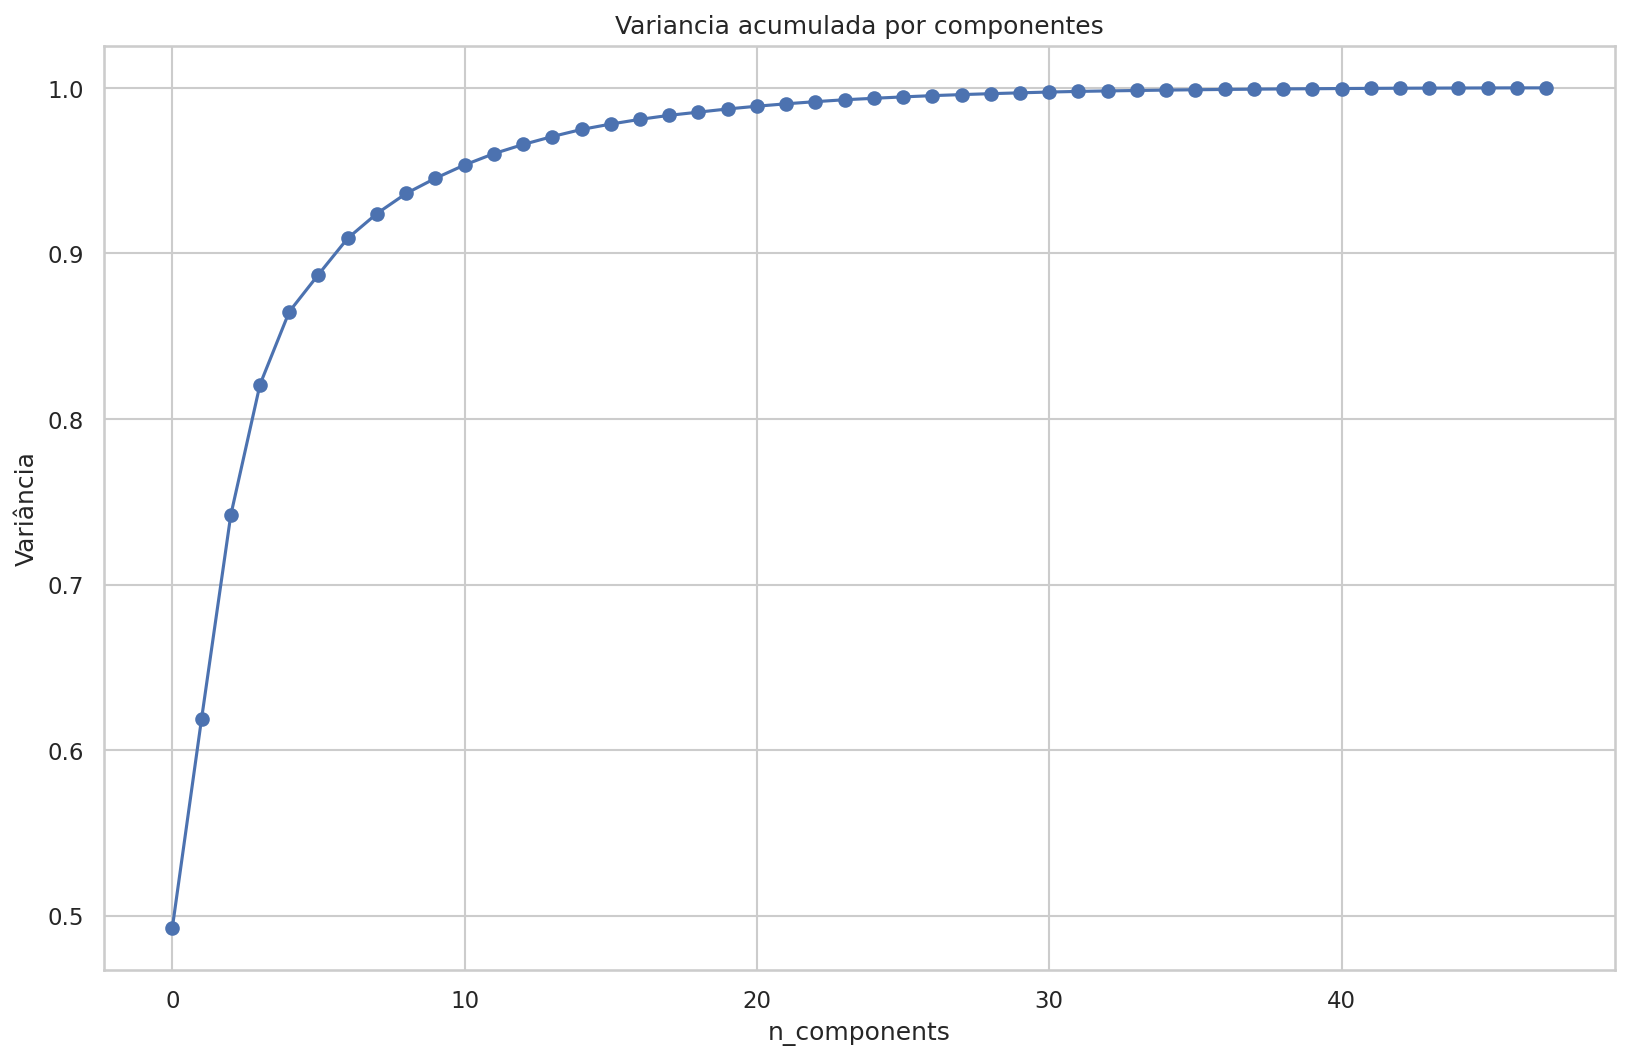

In [ ]:
nums = np.arange(pca_var.shape[0]) # np.arange(48)
plt.figure(figsize=(13,8),dpi=150)
#plt.grid()
plt.plot(nums,cum_sum_var_v2,marker='o')
plt.xlabel('n_components')
plt.ylabel('Variância')
plt.title('Variancia acumulada por componentes')

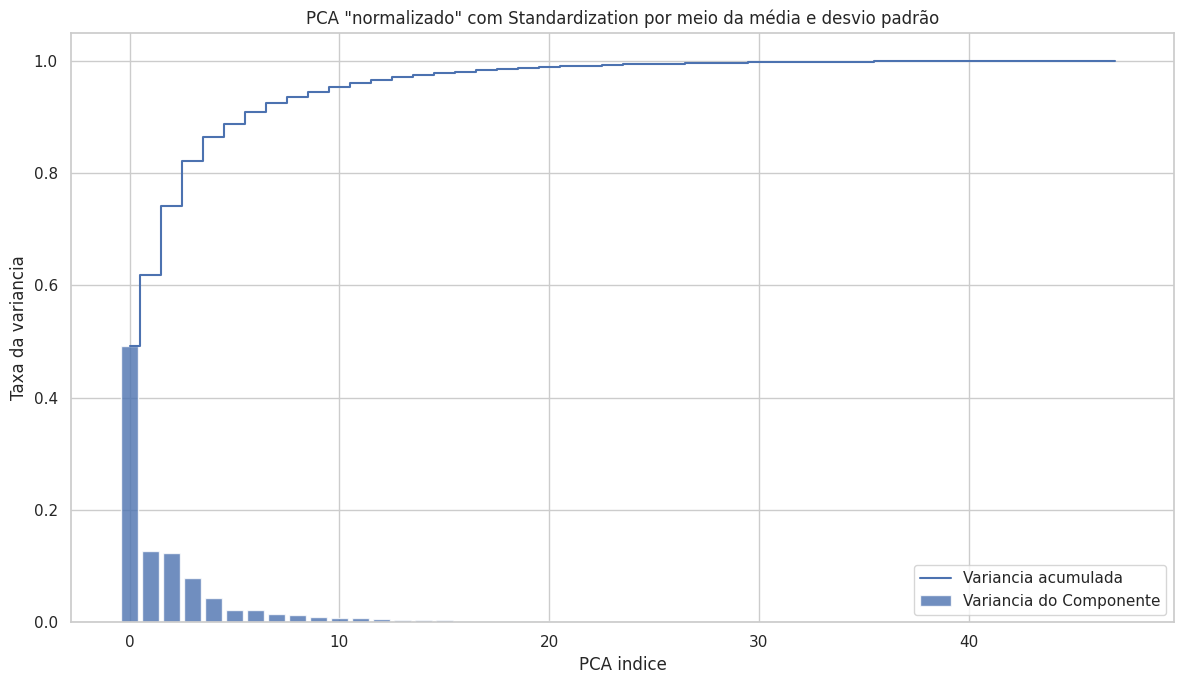

In [ ]:
 #Variancia do PCA
plt.bar(range(0,len(variance_pca_2)), variance_pca_2, alpha=0.8, align='center', label='Variancia do Componente')
plt.step(range(0,len(cum_sum_var_v2)), cum_sum_var_v2, where='mid',label='Variancia acumulada')
plt.title('PCA "normalizado" com Standardization por meio da média e desvio padrão')
plt.ylabel('Taxa da variancia')
plt.xlabel('PCA indice')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Selecionando a quantidade de componentes que serão ussados e ajustando (fit = treino) do modelo

In [ ]:
pca__componentes = PCA(n_components=12)
pca__componentes.fit(z)
scores_pca2 = pca__componentes.transform(z) # Tranformação

In [ ]:
# noprmal_values = pca__componentes.inverse_transform(scores_pca2)
# feat_name = pca__componentes.get_feature_names_out()
# feat_name = pca__componentes.get_feature_names_out()

In [ ]:
scores_pca2.shape

(48, 12)

### Most common measure is Sum of Squared Error (SSE)
### Avaliando e definindo a quantidade de clusters

In [ ]:
# Sum of Squared Error (SSE)
###
cd = []
cluster_s = [1,2,3,4,5,6,7,8,9,10,11,12,14,15]
for nc in cluster_s:
    km_pca = KMeans(n_clusters=nc, max_iter=50, n_init=15)
    km_pca.fit(scores_pca2)
    cd.append(km_pca.inertia_)

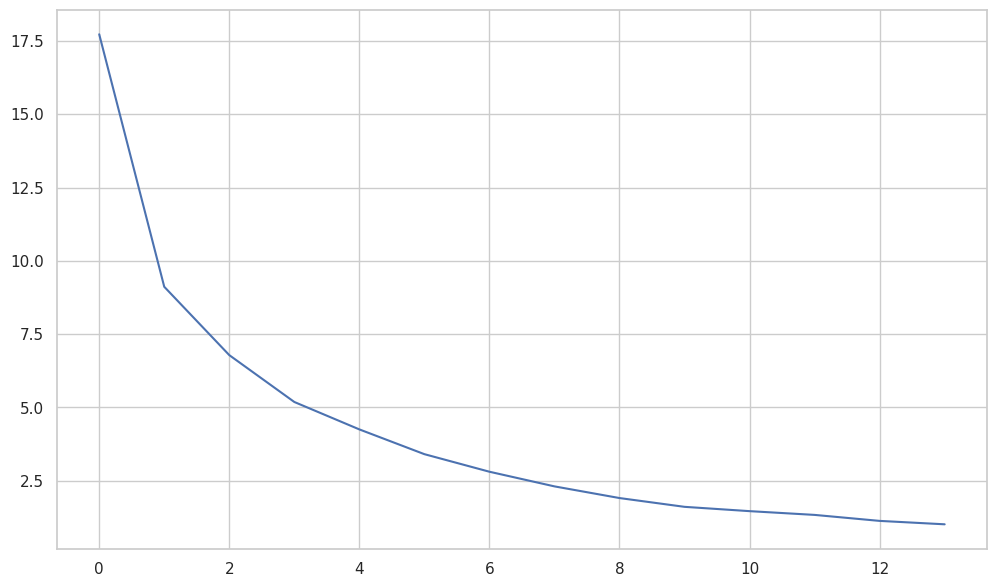

In [ ]:
plt.plot(cd)

## Silhueta

In [ ]:
# Análise da Silhiueta (medidas de separação dos grupos)
cs =[]
clusters_n =[2,3,4,5,6,7,8,9,10,11,12,13]
for nc in clusters_n:
    kmi = KMeans(n_clusters=nc, max_iter=50, random_state=12, n_init=14)
    kmi.fit(scores_pca2)
    clabels = kmi.labels_
    silhue_mean = silhouette_score(scores_pca2,clabels, metric="euclidean")
    cs.append(silhue_mean)
    print('Numero de clusters {0}, distancia média {1}'.format(nc, silhue_mean))

Numero de clusters 2, distancia média 0.4235277048283604
Numero de clusters 3, distancia média 0.4110382460975588
Numero de clusters 4, distancia média 0.3725942150613813
Numero de clusters 5, distancia média 0.3967974565324977
Numero de clusters 6, distancia média 0.4162315553421241
Numero de clusters 7, distancia média 0.4308184744034509
Numero de clusters 8, distancia média 0.4493760492616998
Numero de clusters 9, distancia média 0.4642155799771362
Numero de clusters 10, distancia média 0.48028163167181065
Numero de clusters 11, distancia média 0.4693941378305069
Numero de clusters 12, distancia média 0.42494525721251875
Numero de clusters 13, distancia média 0.3798343408847938


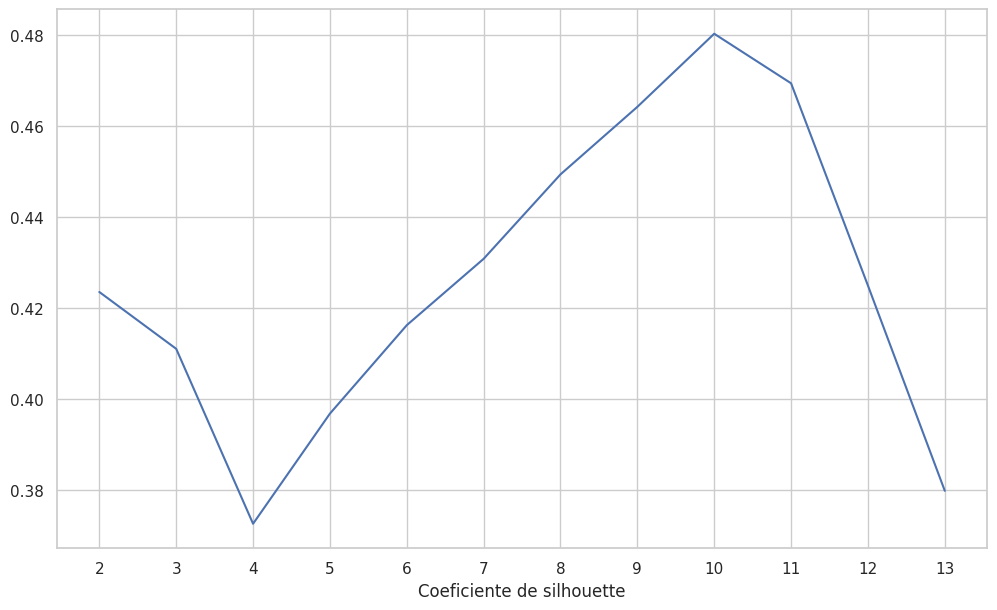

In [ ]:
plt.plot(clusters_n, cs)
plt.xticks(clusters_n)
plt.xlabel("Numero de clusters")
plt.xlabel("Coeficiente de silhouette")
plt.show()

### MODELO KMEANS

In [ ]:
final_km = KMeans(n_clusters=5, max_iter=100)
final_km.fit(scores_pca2)
#pca_df_var['clusters'] = final_km.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=5)

In [ ]:
# Criando dataframe e coletando os clusters criados pelo modelo
pca_df_var_ = pd.DataFrame(data=scores_pca2, columns= ["pca"+str(i) for i in range(1, scores_pca2.shape[1]+1)])
pca_final_2_var = pd.concat([pca_df_var_, genes_transpose[['index']]], axis=1)
pca_final_2_var['clusters'] = final_km.labels_

In [ ]:
pca_final_2_var.shape

(48, 14)

In [ ]:
pca_final_2_var

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,index,clusters
0,-0.320170,0.070398,0.277865,-0.176068,0.139606,-0.011966,-0.066797,-0.028985,0.120956,0.061870,-0.031189,0.060679,H223,1
1,-0.232726,0.383916,0.065076,0.089850,0.073119,-0.034402,0.070567,-0.078399,0.084961,0.061015,-0.012268,-0.069733,H224,1
2,-0.314083,0.330482,0.092618,-0.036615,0.022423,0.084393,-0.053071,-0.069500,0.060620,0.005996,-0.069382,0.000549,H225,1
3,-0.497575,-0.345334,0.001670,-0.042952,0.148924,-0.166838,-0.144469,-0.059538,-0.054585,-0.004954,-0.104026,-0.080766,H226,2
4,0.442766,-0.111033,0.104240,-0.126390,0.116764,0.041945,0.062276,-0.168471,0.087927,0.003968,0.024193,-0.029137,H227,4
5,0.502280,-0.005231,-0.350402,-0.207867,0.065075,-0.053600,0.073678,-0.132109,0.041871,-0.101352,0.009692,0.015498,H228,3
6,0.480679,-0.005970,-0.303490,-0.204879,0.013095,0.004678,-0.015909,-0.171348,0.040052,-0.084443,0.020858,0.018957,H229,3
7,-0.482206,-0.227205,-0.208884,0.183515,-0.065589,-0.110879,0.115875,-0.136515,0.013941,0.113222,-0.109964,0.026701,H230,2
8,0.290916,-0.146509,0.328933,0.164601,-0.139796,-0.014308,-0.017746,-0.120658,0.023389,-0.056190,0.007119,-0.003268,H231,4
9,0.585378,-0.005958,-0.042598,0.223302,0.185372,0.044461,0.025506,0.068189,0.078971,-0.074688,-0.054022,-0.002885,H232,0


In [ ]:
# coletando centroids
centroids = final_km.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]
## anexando do dataframe
## O map vai aplicar uma função em cada item de uma lista de itens, ou seja, é um for com uma chamada da função para aplicá-la a cada item da sua lista.
pca_final_2_var['cen_x'] = pca_final_2_var.clusters.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
pca_final_2_var['cen_y'] = pca_final_2_var.clusters.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})

In [ ]:
# Contando a quantidade de pessoas em cada cluster
pca_final_2_var.groupby("clusters").count()['cen_x']

,cen_x
clusters,
0,9
1,12
2,12
3,0
4,0


In [ ]:
pca_final_2_var['clusters'].groupby(pca_final_2_var['clusters']).count()

,clusters
clusters,
0,9
1,12
2,12
3,8
4,7


/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


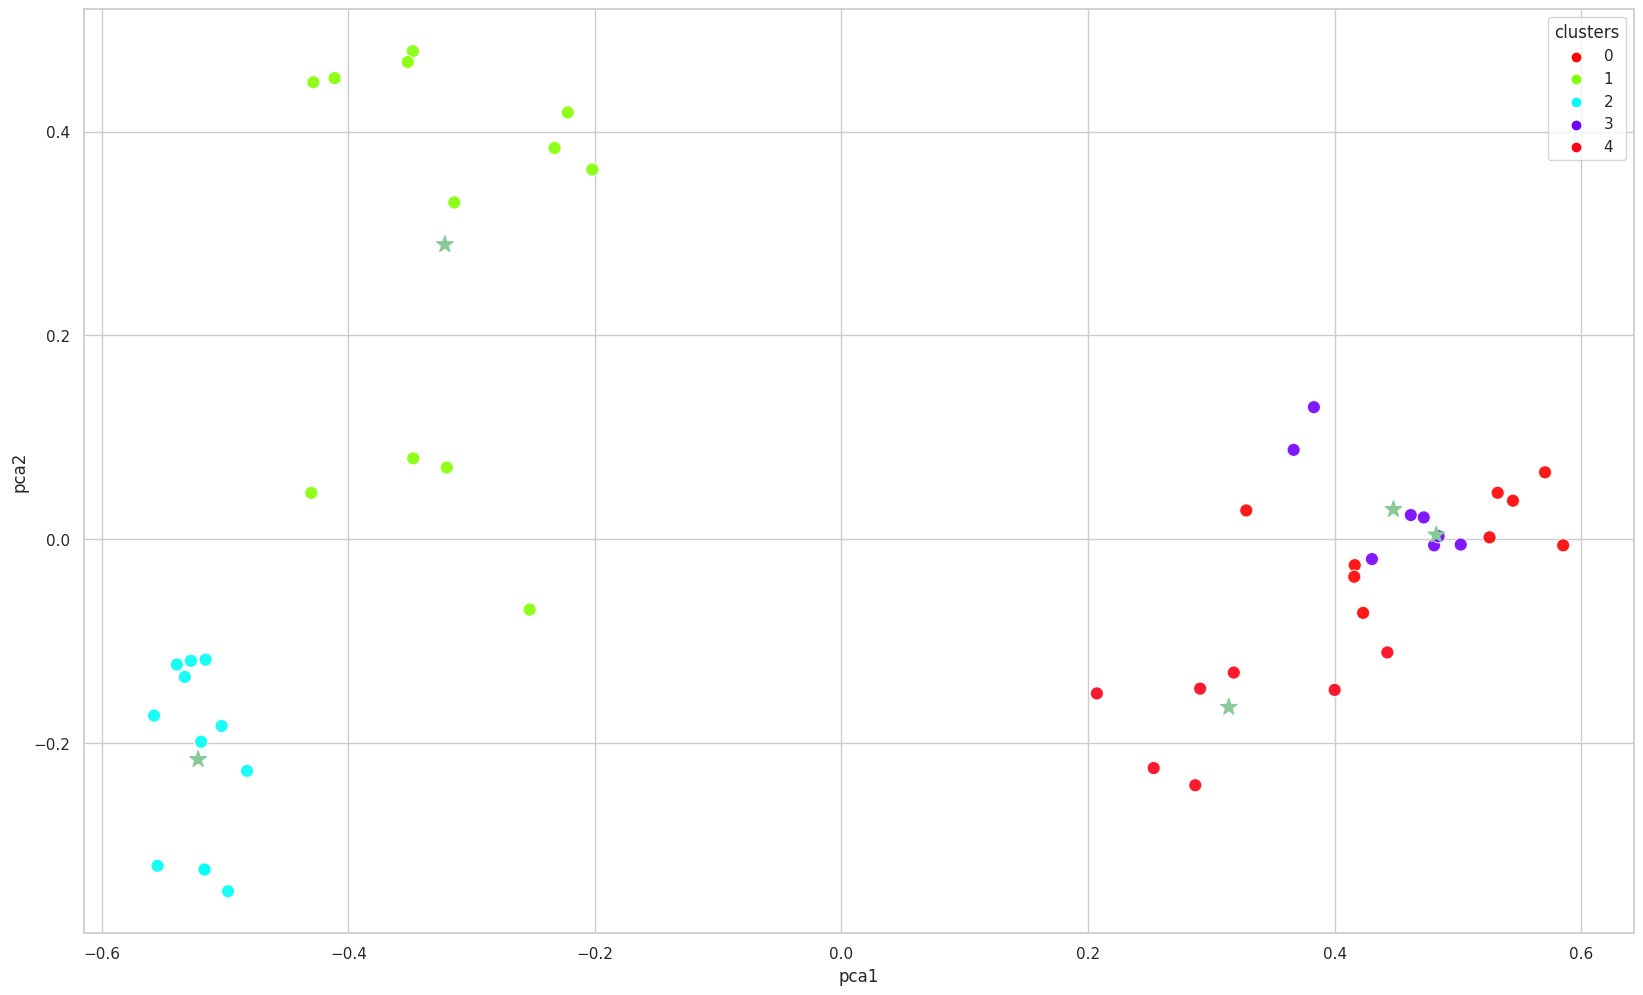

In [ ]:
fig = plt.figure(figsize=(20,12))
sns.scatterplot(pca_final_2_var['pca1'], pca_final_2_var['pca2'], hue=pca_final_2_var['clusters'], palette='hsv', alpha=0.9, s=90)
plt.scatter(cen_x, cen_y, marker='*', c=["#88c999" for i in cen_x], s=150)

/usr/local/lib/python3.10/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


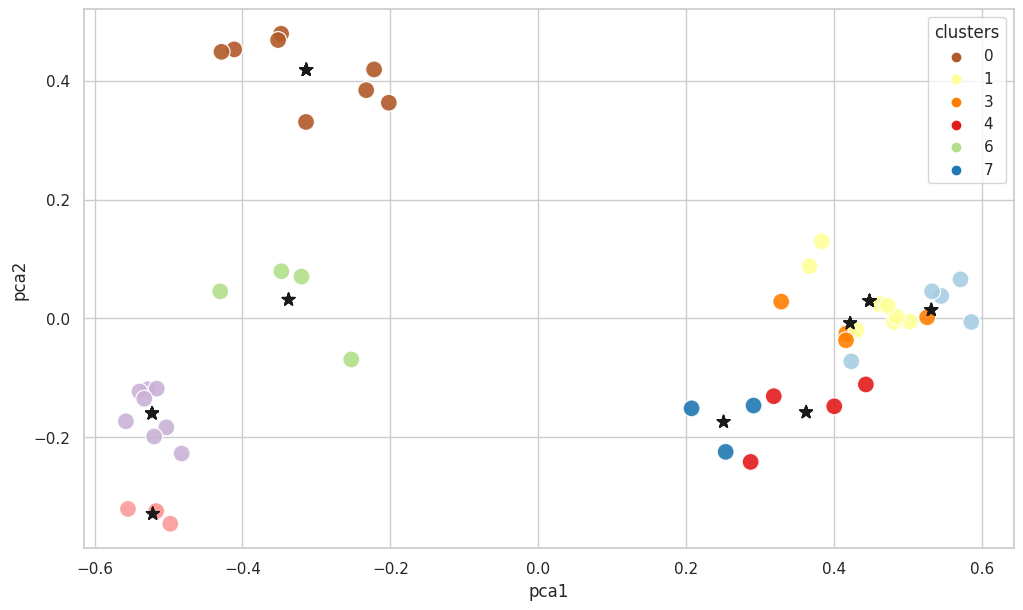

In [ ]:
#fig = plt.figure(figsize=(20,12))
sns.scatterplot(pca_final_2_var['pca1'], pca_final_2_var['pca2'], hue=pca_final_2_var['clusters'], palette='Paired_r', alpha=0.9, s=150)
plt.scatter(cen_x, cen_y, marker='*', color=["k" for i in cen_x], s=90)
# #88c999
plt.show()